In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from server import objNetworkInterface

networkInterfaceObj = objNetworkInterface()

Starting the FPGA controller


FPGA controller is loaded.
Starting Sivers EVK controller
Available interfaces:
  ftdi://ftdi:4232:SNSP200059/1   (EVK06002)
  ftdi://ftdi:4232:SNSP200059/2   (EVK06002)
  ftdi://ftdi:4232:SNSP200059/3   (EVK06002)
  ftdi://ftdi:4232:SNSP200059/4   (EVK06002)

ftdi://ftdi:4232:SNSP200059
Setting frequency to 60.48 GHz
Temperature: 55.147 C
vco_vtune_atc_lo_th: 0x97 (1.658 V)
vco_tune_ctrl: 0x4
vco_tune_status [0x7e]: 0x7e
vco_tune_det_status[0] [1]: 0x3
vco_tune_freq_cnt [0x7ff +/-11]: 0x800
VCO tune OK.
Sivers EVK controller is loaded
Starting TCP server
Buffer size [Before]:16384
TCP server up...


In [3]:
networkInterfaceObj.send(mode= 'ChannelSounder', freq=10, amp=(0.5**5)*(2**16-1)) # mode = 'Sinusoid'

This parts draws the txtd signal in the send function.

1024


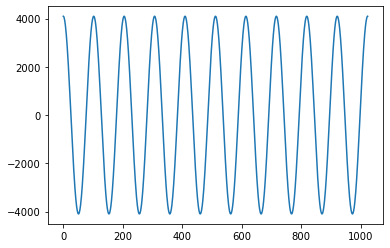

4095.9375


In [5]:
npar = 4
freq = 10
amp=(0.5**4)*(2**16-1)

txtd = np.load('./txtd.npy') # self.wideband()
txtd /= np.max([np.abs(txtd.real), np.abs(txtd.imag)])
txfd = np.fft.fft(txtd)
txtd *= 2**13-1

print((txtd.real).shape[0])
t = np.linspace(0,1,(txtd.real).shape[0])
wt = np.multiply(t,2*np.pi*freq)
x_real = amp*(np.cos(wt))
# x_real = np.int16(x_real).reshape(-1, npar)
x_imag = 0*amp*(np.sin(wt))
# x_imag = np.int16(x_imag).reshape(-1, npar)
plt.plot(x_real)
plt.show()
print(np.max(x_real))